In [1]:
from PIL import Image, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
from transformers import pipeline


def display_images(images = [], rows = 1, cols = 2):
 
  fig, axes = plt.subplots(rows, cols, figsize=(10, 7))
 
  # Display images side by side
  axes[0].imshow(images[0])
  axes[0].axis('off')  # Hide axis for image 1
 
  axes[1].imshow(images[1])
  axes[1].axis('off')  # Hide axis for image 2
 
  # Show the plot
  plt.show()

c:\Users\pilug\Documents\CNN_fuzzer\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


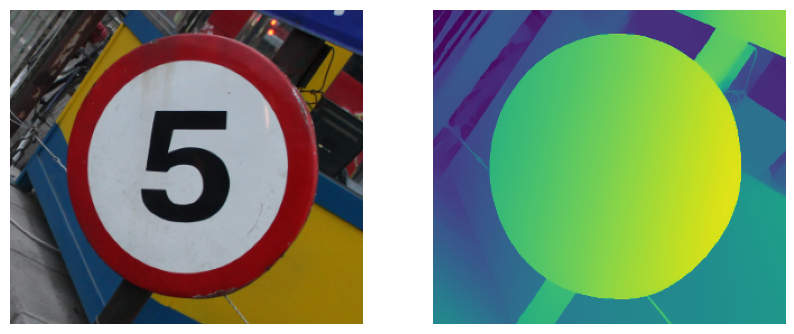

In [2]:
# Replace with your image file path
image_path = 'dataset_split/test/0/000_0019.png' 
img = Image.open(image_path).convert("RGBA")

pipe = pipeline(task="depth-estimation",
                model="depth-anything/Depth-Anything-V2-Base-hf")
# perform depth estimation
depth = pipe(img)["depth"]
 
# display images
display_images([img, depth])

In [20]:
def overlay_transparent_layer(rgb_image, grayscale_image, for_intensity=0.3):
 
    # Create a white layer with the same size as the input images
    white_layer = Image.new('RGBA', rgb_image.size, (240,240,240,0))
 
    # Convert images to numpy arrays for easier manipulation
    rgb_array = np.array(rgb_image)
    grayscale_array = np.array(grayscale_image)
    white_array = np.array(white_layer)
 
    # Calculate alpha values (invert grayscale values)
    alpha = 255 - grayscale_array
 
    # Set the alpha channel of the white layer
    white_array[:, :, 3] = alpha
 
    # Convert back to PIL Image
    white_layer_transparent = Image.fromarray(white_array, 'RGBA')
 
    # Composite the images
    result = Image.alpha_composite(rgb_image.convert('RGBA'), white_layer_transparent)
    fog_overlay = Image.new("RGBA", result.size, (255, 255, 255, int(255 * for_intensity)))
    fogged_image = Image.blend(result, fog_overlay, alpha=for_intensity)
 
    return fogged_image

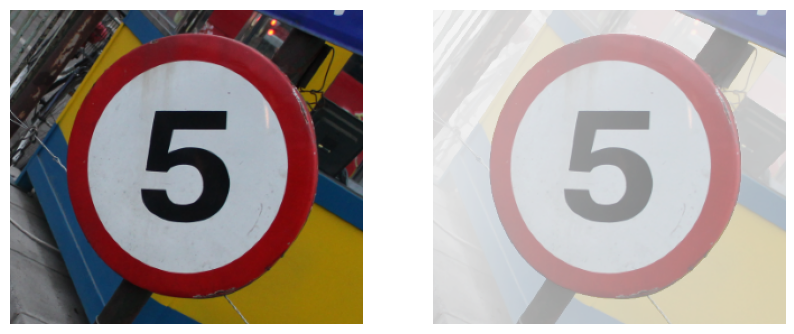

In [21]:
result_img = overlay_transparent_layer(img, depth)
 
# display original image and final output image
display_images([img, result_img])

In [ ]:
import cv2
import numpy as np
import albumentations as A
from albumentations.core.composition import OneOf
from matplotlib import pyplot as plt

def apply_rain(image_pil):
    image_np = np.array(image_pil.convert("RGB"))
    rain_layer = np.zeros_like(image_np, dtype=np.uint8)
    num_drops = 100
    for _ in range(num_drops):
        x = np.random.randint(0, image_np.shape[1])
        y = np.random.randint(0, image_np.shape[0])
        length = np.random.randint(10, 20)
        thickness = np.random.randint(1, 2)
        cv2.line(rain_layer, (x, y), (x, y + length), (200, 200, 200), thickness)
    rain_blur = cv2.blur(rain_layer, (3, 3))
    rained = cv2.addWeighted(image_np, 1.0, rain_blur, 0.5, 0)
    return Image.fromarray(rained)

In [4]:
rain_image = apply_rain(img)

display_images([img, rain_image])

AttributeError: 'Image' object has no attribute 'shape'